# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer** The smartcab takes no actions and remains in its initial state for the duration of the simulation. Even if the environment allows the smartcab to legally move, the agent takes no action. The driving agent (smartcab) recieves positive rewards when it takes the correct action, for example, not moving at a red light when the agent should move straight ahead or turn to the left. The agent receives negative rewards when it takes an incorrect action. The incorrect actions in this implementation of the simulation are not moving when the correct action is to move. For example, if the light is green and the agent should move straight ahead one intersection as determined by the waypoint but does not do so, the agent will receive a negative reward. In terms of the [Markov Decision Process](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-825-techniques-in-artificial-intelligence-sma-5504-fall-2002/lecture-notes/Lecture20FinalPart1.pdf), the policy of the agent is to take no action in every state and it receives rewards dependent on the correctness of the action. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

**`agent.py`**: 
1. `num_dummies`:  A discrete number of dummy agents (those that are not controlled through user code) to populate the environment. The default number of dummy agents is 100. It will be quicker for the agent to learn the optimal policy with more cars in the environment because this will allow the agent to encounter more of the state space in a shorter number of trial steps. More cars will increase the difficulty of reaching the destination and this number needs to be set to the default value for testing. (This variable is set when the environment is created).
2. `learning`: If learning is set to `True`, the driving agent will use Q-learning to determine the optimal policy for navigating the environment. If learning is True, then `epsilon`, the exploration factor, needs to be set to a continuous value in [0.0, 1.0] to control the exploration/exploitation balance and `alpha`, the learning rate, needs to be set to a continuous value in [0.0, 1.0] to control the extent to which the agent relies on current versus old information. The default exploration factor is initialized at 1.0 and the default learning rate is 0.5. The exploration factor decays in a user-defined function over with each training trial, and the testing trials begin when the exploration factor drops below 0.05. The exploration and the learning rate are both set to 0 for testing as the agent is no longer learning a policy, but is executing the optimal policy based on the Q-table created during training. (This variable is set when the smartcab agent is created).
3. `update_delay`: The time in seconds between steps in the simulation. A continuous variable with a default value of 2.0. A value of 2.0 seconds allows for a user to observe the actions of the smartcab. During actual training, this value can be decreased to decrease the run time of the training and testing. (This variable is set when the simulation is created). 
    
**`environment.py`**:
The `act()` function is called when an agent performs an action. This function considers the action, performs the action if it is valid,  and rewards the agent for the action. The agent receives a negative reward if the action is a violation (determined by United States [traffic rules](https://www.justlanded.com/english/United-States/Articles/Travel-Leisure/General-Road-Rules)) and or if the action causes an accident. Positive rewards are given to agent if the action is the correct action for the state.

**`simulator.py`**:
The `render_text()` function displays text output (step results consisting of the state information available to the agent, the action, the reward, and steps remaining to the deadline) in the terminal or command prompt. 
The `render()` function displays the Graphical User Interface (GUI) visualization of the simluation using Pygame. This includes a visual representation grid of the environment and all the agents as well as text displayng the output results from each step. 

**`planner.py`**:
The `next_waypoint()` function checks if the destination is East or West of the intersection before checking if the destination is North or South of the agent's intersection. The waypoint is used to tell the agent which direction it should travel at an intersection in order to reach the destination based on the L1 ([Manhattan](https://en.wikipedia.org/wiki/Taxicab_geometry)) distance. 

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


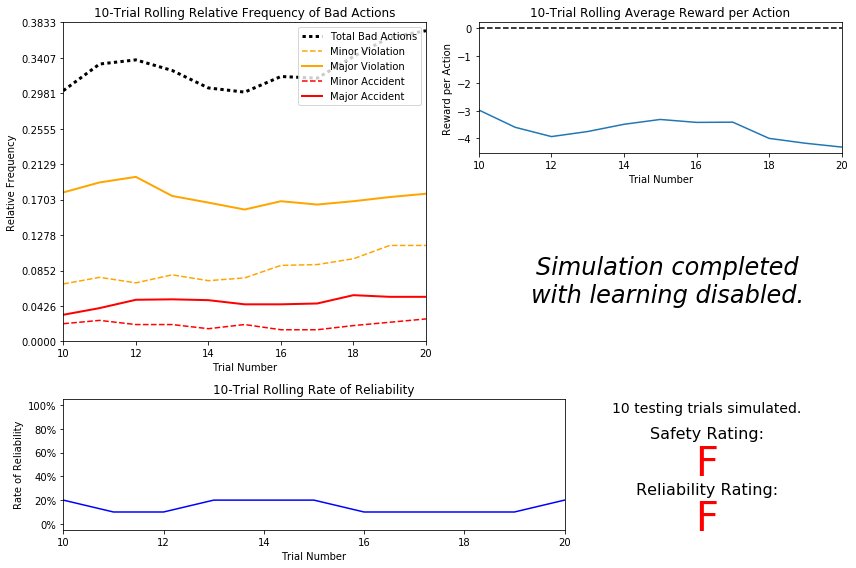

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** The driving agent is making bad decisions roughly 30-35% of the time. Roughly 17-21% of all actions result in a major violation; ~8-12% of all actions result in a minor violation, ~5% of all actions cause a major accident, and ~1-3% of all actions cause a minor accident. 

The 10-trial rolling average rate of reliability (the number of trials in which the smartcab reaches the destination divided by the total number of trials averaged over the past 10 trials) is near 20%. Given that the "smartcab" (not quite smart yet) is making random actions, and that each trial is run for between 20 and 30 actions, this rate of reliability seems correct. The environment is only 8 intersections tall by 6 intersections wide, and subsequently, even an agent operating randomly would be expected to run into the destination in a small percentage of the trials. 

The agent receives negative rewards for actions that either are against the traffic laws (major/minor violations) or that cause an accident (major/minor). The agent receives positive rewards when it completes the correct action for its current state. The 10-trial rolling average reward ranges from -3 to -5. Although the agent is taking bad actions less than half of the time, the average reward is negative. This means that the penalty (negative reward) for taking a bad action is larger in magnitude than the positive reward for taking the correct action. With a policy of taking random actions, it would be expected that the agent would be receiving negative rewards and not improving the average reward per move because the agent is not learning, that is,the agent is not adjusting its policy based upon the rewards. 

The results of the trials do not change significantly as the number of trial increases because the agent is not learning. The policy of choosing a random action remains the same for every trial. Any fluctuations in the graphs are due to the stochastic nature of the simulation and choices made by the agent.  

The driving agent is not reliable or safe. Reliability is defined as the percentage of the time that the agent reaches the destination within the deadline and is near 20%. Safety is defined by the number of traffic violations and accidents recorded by the agent. Based upon the letter scale, the agent fails at both safety and reliablity (receives an "F") and the quantitative statistics tell the same story. A smartcab with a policy of choosing a random action at each state would not be an effective demonstration of the potential of automated vehicles!


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**In terms of engineering efficiency, `waypoint` is the relevant feature. This piece of information indicates the direction the smartcab should take towards the destination given the current intersection and heading of the smartcab. The agent can use this information to maximize efficiency by taking the action in the direction of the destination. This will allow the agent to reach the destination in the shortest period of time, mininizing the number of steps required and improving the reliablity score. 

The `inputs` sensor data is relevant for maximizing the safety of the agent. Safety takes into consideration both traffic violations and accidents, and in order to reduce the number of negative actions, the smartcab needs to learn the traffic rules. Therefore, knowing the environment around the agent including traffic lights and the oncoming car and the car to the left is vital to safety. Knowing the state of the traffic light (`light`) and the rewards received for an action will allow the agent to avoid traffic violations by learning that it is illegal to proceed through a red light while proceding through a green light is legal when one has the right of way. Combining knowledge of the intended direction of travel for the cars around the smartcab (`left` and `oncoming`) with rewards will allow the agent to learn to avoid accidents and to determine the right of way rules. Not all of the `inputs` sensor features are necessary. The `right` data is not relevant to the agent because the car on the right of the agent should not affect its policy. There is no situation in which knowing the intended direction of travel for the car to the right of the agent would need to be taken into account for determining the move of the smartcab. As indicated in [this video outlining proper intersection navigation](https://www.youtube.com/watch?v=0EdkxI6NeuA), the car to the right does not matter to the agent when navigating an intersection. The car to the left of the smartcab does matter because if the smartcab is trying to turn right on a red light, it needs to know if there is a car moving straight across the intersection from the left. There is no analogous situation for the car to the right of the agent. 

The `deadline` feature, or the number of actions remaining for the agent to reach the destination is not needed for safety and efficiency, because it does not change the actions of the smart cab. The policy is independent of the number of remaining actions and depends only on the oncoming car, the car to the left of the agent, the color of the light, and the waypoint. Removing the irrelevant features is necessary as it reduces the state space of the agent and therefore the amount of training time needed for the agent. When training, the agent should visit as many states as possible to learn the optimal policy, and therefore, reducing the state space will allow for quicker training. It will also [reduce the computational complexity](https://en.wikipedia.org/wiki/Model_order_reduction) of the agent because the Q-table will be smaller allowing the agent to make more rapid decisions (although this is not a significant issue for this simulation). 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**The number of possible states for the `waypoint` feature is 3: 'right', 'left', 'forward'. The number of possible states for the `light` data in the `inputs` dictionary is 2: 'red', 'green'. The number of possible states for both the `left` and `oncoming` data in the `inputs` dictionary is 4: 'right', 'left', 'forward', 'None'. The size of the agent's state space is the number of combinations of all of the input feature. This is 3 \* 2 \* 4 \* 4 = 96 possible states. However, for the agent to learn the optimal policy, it must explore every action in every state. There are 4 actions available for the agent at every intersection: 'left', 'right', 'forward', None. Overall, this means that there are 96 \* 4 = 384 state-action pairs for the agent to visit before it can be said to have fully covered the environment. 

Given the time to simulate a training trial, I think it is possible for the agent to learn a policy for each and every state and each and every action. There are only 384 state-action pairs, which means that the agent should be able to encounter all of the possible states within a reasonable number of training trials. Moreover, the time to train is not a significant factor for this simulation, and the number of training trials can be greatly increased without running into time-constraint issues. Ideally, the action would explore each state-action pair multiple times to account for the stochasticity in the simulation but it should be able to learn a near-optimal policy by making every actoin in every state. Therefore, the agent should be able to learn the optimal policy, defined as choosing the action at every state that maximizes safety and reliability. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

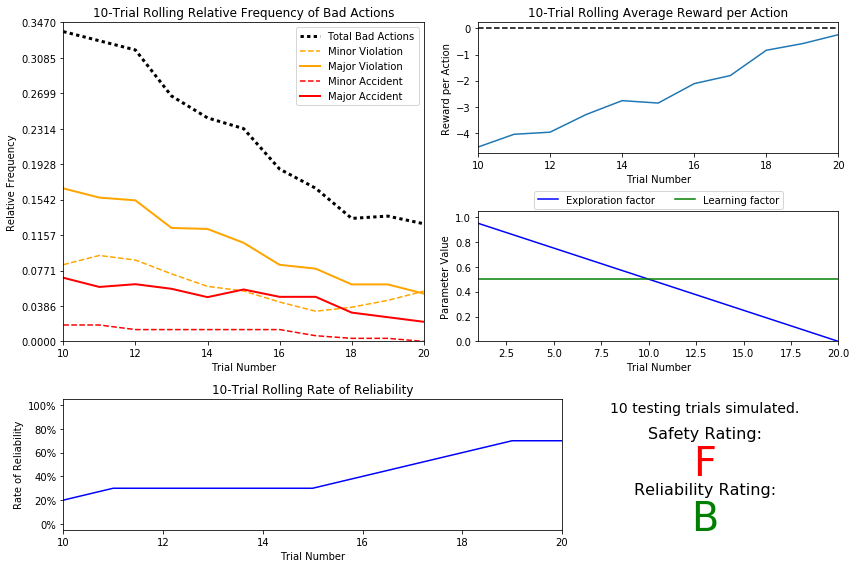

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** It is clear that the agent is learning based on the 10-Trial Rolling Average Relative Frequency of Bad Actions graph. As the number of training trials increases, the overall percentage of bad actions decreases as would be expected if the agent is learning from the rewards it receives for its actions. At the 10th trial, the rolling average of bad actions shows that the agent selects a bad action roughly 35% of the time which is essentially the same as the agent with the random action policy. By the end of the 20 training trials, the agent is making a bad action only ~15% of the time! While not stellar, this is an improvement over the agent with the random action policy. At the end of training, out of all actions, ~10% result in a major violation, ~3% result in a minor violation, ~3% cause a major accident, and \<1% cause a minor accident. This shows that as the training progresses, the agent learns from each state action pair and subsequently, when the agent encounters a state in its [Q-table](http://artint.info/html/ArtInt_265.html), it chooses actions that are less likely to result in negative rewards.

The percentage of bad actions decreases with increasing training trials because epsilon, the exploration factor, decreases linearly over the course of the trials. The exploration factor is a hyperparameter that dictates the ratio of exploration versus exploitation of the agent. When the ratio is 1.0, the agent will choose a random action in order to explore the state space. As the rate decreases, the agent will begin to exploit, or choose actions based on its Q-table that it "knows" will result in higher rewards. The exploration rate is initially set to 1.0 so that the agent will encounter as many different states as possible in order to construct the Q-table. When the exploration rate is 0.0, the agent will always choose the action with the highest utility for the current state as indicated by the Q-score. When testing, the exploration factor is set to 0.0 because the agent should have already learned the optimal policy in each state and needs to execute the optimal action based on the state. The decrease in the exploration rate, epsilon, can be observed in the Exploration Factor and Learning Factor chart. The exploration factor decreases linearly by a constant 0.05 per trial and the tolerance for intiating training is set at an epsilon of 0.05. This results in 20 training trials in which the agent can learn the optimal action for each state. The other hyperparameter in this chart is the Learning Factor, alpha, the balance between current rewards and old rewards. The Q-value for each state action pair is a linear combination of the old rewards and the current rewards. Mathematically this is expressed as: 

$$  Q(s, a) = (1-\alpha) * rewards_{old} + \alpha * rewards_{current} $$
A learning rate of 1.0 means that the agent only considers the current rewards when valuing an action for a given state while a learning rate of 0.0 means that the agent would rely only on past rewards. This is set at a constant 0.5 for the default learning agent. 

The 10-Trial Rolling Rate of Reliability also demonstrates the agent is learning. As the number of training trials progresses, the rolling average of reliability increases indicating that the agent is reaching the destination a larger percentage of the time. In fact, on the testing trials, the agent reaches the destination 8 out of 10 times which is good enough for a reliability score of a B! This is substantially improved compared to the agent with a random policy which achieved a reliability score of 30% on the testing trials. Overall, the agent still recorded an F for the safety score, but the agent is making far fewer bad actions and additional training trials or a tweaking of the exploration/exploitation decay function and the learning rate can optimize the agent. 

The 10-Trial Rolling Average of Reward per Action shows the agent learning to avoid the bad actions and choose better actions over time. By the end of the training trials, the average score per action is approaching zero, and the trend is clearly upwards over the final 10 training trials. Again, the initial negative average score indicates that the agent is still exploring the state space and the score only begins to approach positive values as the agent begins to exploit by choosing actions with the highest utility based on the Q-table. The agent without learning did not improve on this metric at all over the course of the trials. 

Based upon the text file created during the simulation, 85 states were encountered during the learning (training trials). This means that not all of the possible 96 states in the state space were seen by the agent over the course of the training runs. Additionally, many of the states (combinations of the direction of the waypoint, the traffic light status, the intended direction of travel of the car to the left and the direction of travel of the oncoming car) have 0.0 Q-values for some of the actions. As 0.0 was the initial Q-value for each action, the agent has not had the opportunity to try each action at every state. To learn the optimal policy, the agent must visit every state and take every allowed action at each state. The state space was too large for the number of training runs, and the exploration/exploitation rate must be decreased at a slower rate to enable more training runs. 

The final safety of the agent was a 'F', and the final reliability was a 'B'. The reliability indicates that 80% of the time, the agent reached the destination before the deadline. The safety did not improve in terms of the grade letter, but contrasting the graphs of fraction of bad actions taken and average reward per action, the default learning agent improved substantially over the course of the training trials compared to the agent implementing a random strategy which did not improve at all. With a larger number of training trials and a larger exploration of the state space, the agent can be expected to perform better in terms of both safety and reliability.  

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

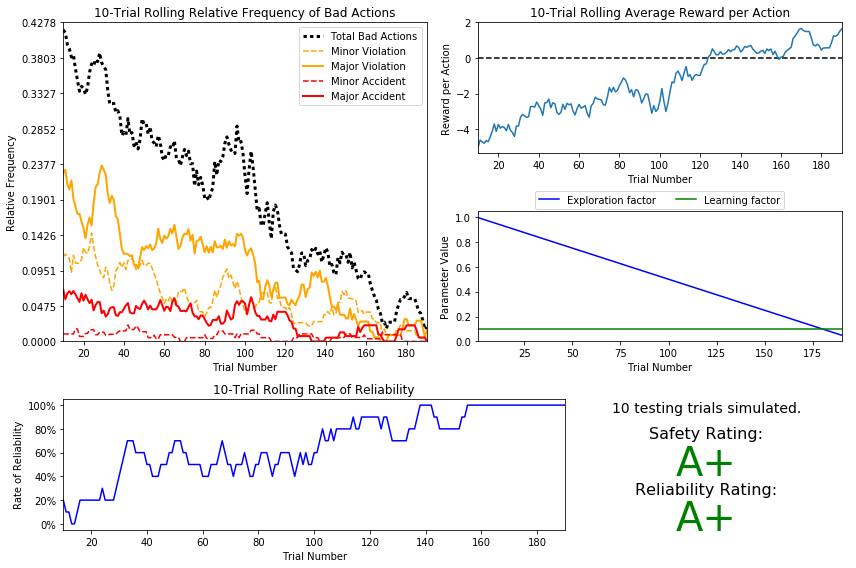

In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** The decay function for epsilon was a linear equation: $$ \epsilon = \epsilon - 0.005 $$ where the initial value of epsilon was 1.0 and the threshold for beginning the testing trials was epsilon = 0.05. This resulted in 190 training trials. Running these trials with a 0.01s delay between simulation steps took approximately 48 seconds and the training time was not an issue. The learning rate, alpha, was set to 0.1. Both alpha and the decay function for epsilon were determined through a sequence of trial and error. The table below summarizes the different model hyperparamets that used for training and the resulting grade and reliability in testing: 

|       Parameters       |                                   |                                  |                                  |                                   |                                   |
|:----------------------:|-----------------------------------|----------------------------------|----------------------------------|-----------------------------------|-----------------------------------|
|          Trial         |                 1                 |                 2                |                 3                |                 4                 |                 5                 |
|  alpha (learning rate) |                0.1                | 0.25                             | 0.25                             | 0.3                               | 0.1                               |
|   epsilon_0 (initial)  |                1.0                | 1.0                              | 1.0                              | 1.0                               | 1.0                               |
| epsilon decay function | $$ \epsilon = \epsilon - 0.025 $$ | $$ \epsilon = \epsilon - 0.025$$ | $$ \epsilon = \epsilon - 0.02 $$ | $$ \epsilon = \epsilon - 0.015 $$ | $$ \epsilon = \epsilon - 0.005 $$ |
|        tolerance       |                0.05               | 0.05                             | 0.05                             | 0.05                              | 0.05                              |
|     n_training runs    |                 40                | 40                               | 48                               | 63                                | 190                               |
|         n_test         |                 10                | 10                               | 10                               | 10                                | 10                                |
|      Safety Grade      |                 A                 | F                                | F                                | F                                 | A+                                |
|    Reliability Grade   |                 A                 | A+                               | A+                               | B                                 | A+                                |
| Reliability Pct        | 90%                               | 100%                             | 100%                             | 80%                               | 100%                              |
| States Visited         | 87                                | 87                               | 87                               | 88                                | 95                                |
As can be seen from the final results on the testing trials, the improved agent performs much better than the default learning agent. Both the safety and the reliability score are at the maximum grade level and the agent reached the destination 100% of the time in the testing trials. Moreover, the graphs show the vast improvement of the agent over the course of the learning trials. The visualizations demonstrate that over the training, the average reliability increases, the fraction of bad actions decreases, and the average reward per action steadily increases and even reaches positive levels. The exploration factor can be observed to linearly decay while the learning rate is set at a constant 0.1 which means that old rewards are valued more than current rewards. By the end of the training, the average action of the agent resulted in a positive reward and the agent reached the destination 100% of the time within the deadline resulting in the highest grade level on the testing. I conclude that based on the statistics and the visualizations, the improved agent has a policy superior to that of the default learner. The smartcab is now able to navigate the streets both safely and reliably. The reinforcement learning has clearly been successful in teaching the agent how to navigate the environment and reach the destination in accordance with traffic rules. 

I am satisfied with the final safety and reliability of the agent. It did take a large number of training trials (190) to achieve these levels, but with the relatively short simulation time, the resources needed for training simulations was not an issue. The learner could still be improved because the number of states visited was only 95, which does not represent all of the 96 possible states. Additionally, not all actions have a Q-value at each state, meaning that the agent was not able to explore all of the 384 state-action pairs during training. Therefore, the agent could still take an incorrect action in some states and has not learned the complete optimal policy. This could be corrected by increasing the number of training trials or adjusting the exploration rate decay factor to allow the agent to visit more of the state space during training. Ideally, the agent would be able to visit each action in every state multiple times in order to learn the complete optimal policy while accounting for the randomness in the environment and construct the optimal Q-table. Morevoer, it might be possible to reduce the number of training trials while maintaining the highest safety and reliability score through an adjustment of the exploration/exploitaion factor decay function and the learning rate. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 
1. The optimum policy would be one that does not break any of the United States' traffic laws and that is able to reach the destination within the deadline every time. The optimal policy would have to obey the following conditions:
    + The agent must choose the action that leads towards the destination at every single state except when prohibited by the traffic laws. 
    + If the agent needs to move forward at an intersection, it must only do so when the light is green. If this condition is not met, the correct action is None.
    + If the agent needs to move left at an intersection, it must only do so when the light is green and there is no oncoming car traveling straight or turning right. If these conditions are not met, the correct action is None. 
    + If the agent needs to move right at an intersection, it must do so when the light is green, or when the light is red and there is no car to the left of the agent traveling straight. If these conditions are not met, the correct action is None. 
2. The final learning agent has visited 95 of the 96 possible states in the simulation. Not all states have a Q-score that is in agreement with the optimal policy. This means that the agent has not learned the true optimal policy and requires further training in order to guarantee that the safety and reliablity are maximized within the environment. 
3. The Q-table is organized in the following manner: 

`(waypoint direction, traffic state, direction of travel of car to left, direction of travel of oncoming car)
--forward: Q-score
--right: Q-score
--None: Q-score
--left: Q-score`

The information in parenthesis indicates the state of the agent, and the information in the entry corresponds to the four possible actions that the agent has at each state along with the Q-score as determined from the rewards. The waypoint direction is the direction that the agent should travel to reach the destination with respect to the current intersection and heading of the agent. The Q-score the total utility of the action based on past rewards and the current reward in a ratio defined by the learning rate. Therefore, the correct action at a state should have the highest Q-score for the agent to have learned the optimal policy. In training, a random action is chosen with the exploration rate probability otherwise the action with the highest Q-score is selected. When testing, when the agent enters a state, the action with the highest Q-score is executed. 

The following examples all indicate states where the Q-table is in line with the optimal policy:
`('left', 'green', 'forward', 'left')
 -- forward : 0.12
 -- right : 0.11
 -- None : -1.35
 -- left : 1.15`
 
In this state, the waypoint calls for the agent to turn left, the light is green, the car to the left of the agent is moving forward but cannot do so because the light for it is red, and the oncoming car is turning left. Therefore, the correct action for the agent is to execute a left-hand turn. This is indeed the action with the highest Q-score in this state, indicating that the agent learned the optimal policy for this state. 
 
`('right', 'green', 'left', 'right')
 -- forward : 0.00
 -- right : 0.54
 -- None : -0.94
 -- left : 0.23`
 
In this state, the waypoint calls for the agent to turn right, the light is green, the car to the left of the agent is turning left but cannot do so because the light for it is red, and the oncoming car is turning right. The agent has the right of way because the light is green and the agent needs to turn right. This is the move with the highest Q-value indicating that the agent has learned the optimal policy at this state. 
 
`('right', 'red', 'left', 'forward')
 -- forward : -0.98
 -- right : 0.82
 -- None : 0.02
 -- left : -4.98`
 
In this state, the waypoint indicates the agent should turn right, the light is red, the car to the left of the agent is turning left, and the oncoming car is moving forward but cannot do so because the light for it is red. The correct action is to turn right ([after coming to a complete stop at the red light and unless forbidden by signage or local traffic laws](https://en.wikipedia.org/wiki/Turn_on_red#North_America)) because the car moving through the intersection on the left of the agent is turning left. The agent has the right of way to execute a right hand turn which is what will occur duiring testing because that is the action with the highest Q-score. The agent has learned the optimal policy for this state. 
4. There are several examples where the agent has not learned the optimal policy. 
The examples below indicate states in which the agent did not learn the correct action for the state:
`('right', 'green', 'forward', 'right')
 -- forward : 0.23
 -- right : 0.11
 -- None : 0.00
 -- left : 0.07`
 
 In this state, the waypoint indicates the agent should turn right, the light is green, the car to the left of the agent is moving forward but cannot do so because the light is red, and the oncoming car is turning to the right. The correct action in this case is for the agent to turn right because that is in the direction of the destination and the agent has the right of way. However, the action with the highest Q-score is proceding forward. While this is not in violation of any traffic laws, this is not the optimal move in terms of efficiently reaching the destination. Therefore, this action satisfies the safety requirement but not the efficiency requirement and is not within the optimal strategy.
 
 
`('forward', 'green', 'right', 'right')
 -- forward : 0.00
 -- right : 0.00
 -- None : 0.00
 -- left : 0.07`
 
 In this state, the waypoint directs the agent to move forward, the light is green, the car to the left of the agent is turning left but cannot do so because the light is red, and the oncoming car is turning right. The move that obeys the optimal strategy is to move forward through the light. However, the move with the highest Q-score is to turn left. This is in contrast with both the safety and reliability aspects of an optimal learner. The agent cannot turn left because the oncoming car has the [right of way](http://www.myreporter.com/2012/04/which-driver-has-the-right-of-way-while-turning-at-a-traffic-signal/). Moveover, turning left is not the most efficient move as the destination is in front of the agent. If executed in the environment, this move could lead to a minor accident or minor violation. This is an interesting state because the only action with a weight is the left action. That likely means that the left action was the only action ever executed in this state and it did not result in a minor accident or minor violation and subsequently the agent did not receive a negative reward for turning left. The agent would therefore have no reason to "think" that turning left in the future would be a negative because it does not have the feedback to reinforce that the action is negative. This indicates that the agent has not encountered this state enough times to learn the optimal policy. Both of the states in which the agent has not learned the optimal policy are due to insufficient training. The agent has not encountered the state enough times or executed all the actions at the state to learn what it should be doing to reach the destination the quickest in accordance with the traffic laws. 
 
Clearly, the agent would benefit from more training trials, and the A+ scores on the both the reliability and safety metric are not guaranteed across every testing run. Perhaps a better strategy for exploring more of the state-action pairs would be to keep the exploration rate relatively high, near 1.0, throughout the duration of the training. This would allow the agent to continuing exploring throughout training rather than starting to exploit moves as the exploration rate declines. During training, the agent does not need to exploit moves because the objective of training is to learn the optimal policy rather than try to record the highest reliability and safety score. For testing, the exploration rate is set to 0.0 in order for the agent to fully exploit the (ideally optimal) Q-table that is has developed during training. As the Q-table in this case does not completely describe the optimal policy, the states with the non-optimal policy must never have been encountered by the agent as it recorded flawless scores on both testing metrics. If the number of testing runs were increased with the same testing scheme, I would expect that the scores would decrease because eventually the agent would encounter a state in which it does not have the optimal action encoded as the action with the highest score in the Q-table. The agent should be further trained, and for this exercise, the Q-table could be manually checked to ensure that the optimal poliy is implemented at every state. The Q-table could even be hard-coded with the correct action to take in every state because of the relatively small size of the state space. In the real world, the [state space of self-driving cars](https://arxiv.org/pdf/1604.07446.pdf) is nearly infinite and the agent must be able to learn an optimal strategy, or as near-optimal of a strategy as possible, without a significant amount of hard-coding by humans. The state space in the real world can never be fully defined, and eventually self-driving vehicles will have to make decide the best action in novel situations entirely by themselves in accordance with the rules they have learned. 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**One way of implementing Q-value based iteration is to calculate the utility of each action in each state based not only on the past and current rewards, but also on the future expected rewards from the sequences of all possible state-action pairs following the current state. However, in a game with finite timescales, there needs to be an incentive for the agent to reach the end goal quickly, otherwise the path that maximizes the future rewards will simply be the longest path and the series with never converge. Gamma, or the [discount factor](http://www.cs.ubc.ca/~murphyk/Bayes/pomdp.html), is a term that typically starts at 1.0 and decays to zero over time to lend less weight to future rewards and ensure that the sequence converges in finite time. In order for the agent to use future rewards, it must be able to calculate the expected reward of all possible paths (states and actions) starting from its current state. Moreover, future rewards only make sense if the rewards in the environment are casually connected, that is, a current reward depends not only on the previous action, but on all previous actions. In the smartcab environment, neither of these two conditions is met. First, the environment is not casually connected. Actions do not propogate forward in a determistic manner, and rewards are based only on the previous action. For example, if the agent moves forward through a red light and receives a major traffic violation, that negative reward is based only on the single action of moving through the red light and not on all previous actions. Therefore, the [temporal credit assignment](http://www.scholarpedia.org/article/Reinforcement_learning#.28Temporal.29_Credit_Assignment_Problem) problem that arises when rewards are delayed and the agent cannot know which previous action actuallycontributed to the current reward, does not apply in the smartcab environment. The agent knows that the move directly preceding the reward was the sole cause of the reward because the rewards are immediate. The second factor that makes future learning not valid for this application is that the agent only has knowledge of the immediate state. The inputs that define the state are for the current state only, and because the environment is not deterministic, the agent has no method of knowing what the state will be in the future. Therefore, it is impossible to accurately calculate the future value of all paths propagating from the current state because the agent does not know what the environment will look like at a future state and it does not know the reward it can receive from all of the paths moving forward in time. The agent can construct the optimal Q-table based only on the inputs which define the state, the old Q-value for the action taken in the state, and the reward received as a result of the action executed in the state. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.